### Load the example LV model from the shared representation into MIRA and display the TemplateModel

We load the canonical Lotka-Volterra model from the Model-Representations repo into a MIRA Template Model.

In [1]:
from mira.sources.amr.regnet import *

In [2]:
tm = model_from_url('https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/'
                    'main/regnet/examples/lotka_volterra.json')

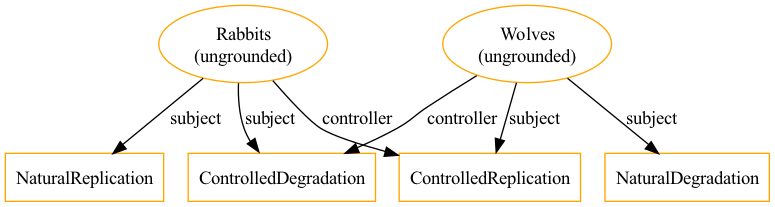

In [3]:
tm.draw_jupyter()

Here is an example rate law from the model:

In [4]:
print(tm.templates[-1].rate_law.args[0])

Rabbits*Wolves*delta


### Export the MIRA TemplateModel into the shared representation

Here we show that we can export the model back into a valid regnet AMR.

In [5]:
from mira.modeling import Model
from mira.modeling.amr.regnet import AMRRegNetModel

In [6]:
rm = AMRRegNetModel(Model(tm))

In [7]:
rm.to_json()

{'header': {'name': 'Lotka Volterra',
  'schema': 'https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/regnet_v0.2/regnet/regnet_schema.json',
  'schema_name': 'regnet',
  'description': 'Lotka Volterra model',
  'model_version': '0.1'},
 'model': {'vertices': [{'id': 'Rabbits',
    'name': 'Rabbits',
    'grounding': {'identifiers': {}, 'context': {}},
    'rate_constant': 'alpha',
    'sign': True},
   {'id': 'Wolves',
    'name': 'Wolves',
    'grounding': {'identifiers': {}, 'context': {}},
    'rate_constant': 'gamma',
    'sign': False}],
  'edges': [{'id': 't3',
    'source': 'Rabbits',
    'target': 'Wolves',
    'sign': False,
    'properties': {'name': 't3', 'rate_constant': 'beta'}},
   {'id': 't4',
    'source': 'Wolves',
    'target': 'Rabbits',
    'sign': False,
    'properties': {'name': 't4', 'rate_constant': 'delta'}}],
  'parameters': [{'id': 'alpha', 'value': 0.667},
   {'id': 'gamma', 'value': 1.0},
   {'id': 'beta', 'value': 1.333},
   {'id': 'delt

### Export the same underlying MIRA TemplateModel into a PetriNet representation

This model is also compatible with a Petri net representation so we show that we can export it into a Petri net AMR.

In [8]:
from mira.modeling.amr.petrinet import AMRPetriNetModel

In [9]:
pm = AMRPetriNetModel(Model(tm))
pm.to_json()

{'header': {'name': 'Lotka Volterra',
  'schema': 'https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/petrinet_v0.6/petrinet/petrinet_schema.json',
  'schema_name': 'petrinet',
  'description': 'Lotka Volterra model',
  'model_version': '0.1'},
 'properties': {},
 'model': {'states': [{'id': 'Rabbits',
    'name': 'Rabbits',
    'grounding': {'identifiers': {}, 'modifiers': {}}},
   {'id': 'Wolves',
    'name': 'Wolves',
    'grounding': {'identifiers': {}, 'modifiers': {}}}],
  'transitions': [{'id': 't1',
    'input': ['Rabbits'],
    'output': ['Rabbits'],
    'properties': {'name': 't1'}},
   {'id': 't2',
    'input': ['Wolves'],
    'output': [],
    'properties': {'name': 't2'}},
   {'id': 't3',
    'input': ['Wolves', 'Rabbits'],
    'output': ['Wolves'],
    'properties': {'name': 't3'}},
   {'id': 't4',
    'input': ['Rabbits', 'Wolves'],
    'output': ['Rabbits', 'Wolves'],
    'properties': {'name': 't4'}}]},
 'semantics': {'ode': {'rates': [{'target': 't1',

### Stratify the model into two subspecies of wolves

We model a stratification where we split the population of wolves into two subspecies. There is no transition between the two subspecies (that wouldn't fit into the regnet framework), so e.g., we would be limited if we wanted to introduce multiple locations between which animals migrate.

In [10]:
from mira.metamodel.ops import stratify

In [11]:
tm2 = stratify(tm, key='subspecies', concepts_to_stratify=['Wolves'], strata=['brown', 'gray'], structure=[])

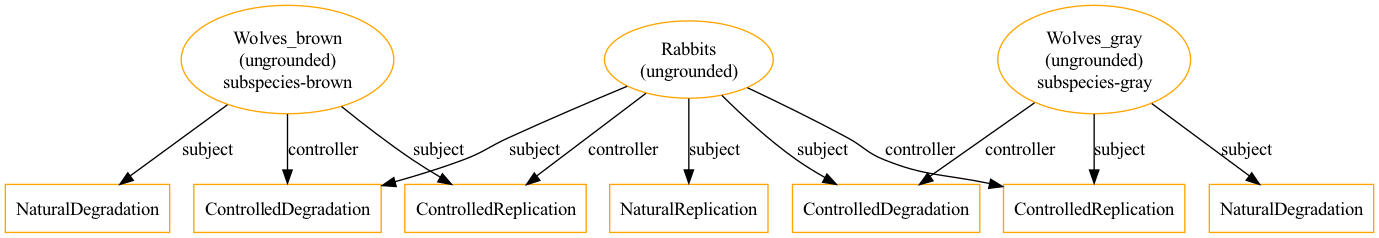

In [12]:
tm2.draw_jupyter()

In [13]:
AMRRegNetModel(Model(tm2)).to_json()

{'header': {'name': 'Lotka Volterra',
  'schema': 'https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/regnet_v0.2/regnet/regnet_schema.json',
  'schema_name': 'regnet',
  'description': 'Lotka Volterra model',
  'model_version': '0.1'},
 'model': {'vertices': [{'id': 'Rabbits',
    'name': 'Rabbits',
    'grounding': {'identifiers': {}, 'context': {}},
    'rate_constant': 'alpha',
    'sign': True},
   {'id': 'Wolves_brown',
    'name': 'Wolves_brown',
    'grounding': {'identifiers': {}, 'context': {'subspecies': 'brown'}},
    'rate_constant': 'gamma_0',
    'sign': False},
   {'id': 'Wolves_gray',
    'name': 'Wolves_gray',
    'grounding': {'identifiers': {}, 'context': {'subspecies': 'gray'}},
    'rate_constant': 'gamma_1',
    'sign': False}],
  'edges': [{'id': 't4',
    'source': 'Rabbits',
    'target': 'Wolves_brown',
    'sign': False,
    'properties': {'name': 't4', 'rate_constant': 'beta_0'}},
   {'id': 't5',
    'source': 'Rabbits',
    'target': 'Wolv